In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.load('final_pulsar_data.npy')
data

array([[ 0.16381678,  0.06899792, -0.1634486 , ..., -0.05564172,
         0.047163  ,  0.10593097],
       [ 0.04987612, -0.22056358, -0.08527701, ..., -0.04915287,
         0.1875721 ,  0.13540046],
       [-0.4296945 , -0.01622798, -0.09878167, ..., -0.03515359,
        -0.15997754,  0.21362475],
       ...,
       [ 0.0150392 , -0.18770596, -0.14498828, ..., -0.26043433,
        -0.36656117, -0.07521071],
       [-0.07545114, -0.15957798,  0.12094107, ..., -0.22340402,
        -0.138991  , -0.0017923 ],
       [-0.41530117,  0.00462799,  0.0398263 , ..., -0.04216291,
        -0.30443954, -0.21839654]], dtype=float32)

In [3]:
print(len(data),len(data[0]))

32 254


Text(0.5, 1.0, 'Waterfall Plot/Spectrogram')

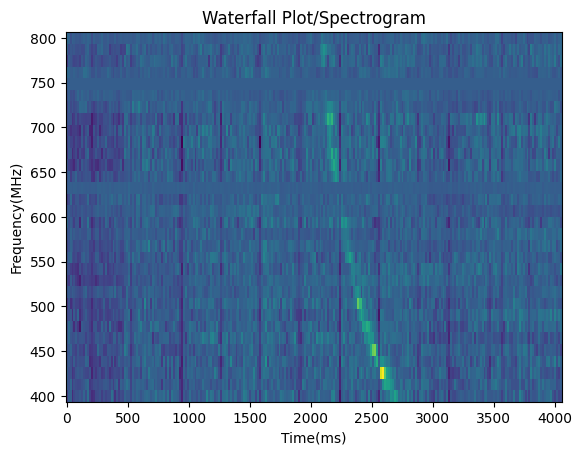

In [14]:
time=np.linspace(0,16*253,254,endpoint=True)
frequency=np.linspace(800,400,32,endpoint=True)
plt.pcolormesh(time,frequency,data,shading='auto')
plt.xlabel('Time(ms)')
plt.ylabel('Frequency(MHz)')
plt.title('Waterfall Plot/Spectrogram')

In [5]:
# Array consisting of possible dispersion measures
DM=np.linspace(1,1000,100)

#Delay caused by each of these DMs
#Array dim:(no of dms X no of frequencies)
delay=np.array([4148.808*dm/(frequency)**2 for dm in DM])

#No of backsteps caused by each of these DMs
#Array dim:(no of dms X no of frequencies)
backsteps=delay*1000/16

In [6]:
# Function to push back delayed arrays
def moveback(arr,nsteps):
    new_arr=[]
    for elt in arr[nsteps:]:
        new_arr.append(elt)
    for elt in arr[0:nsteps]:
        new_arr.append(elt)
    return np.array(new_arr)
moveback([1,2,3,4,5,6],2)

array([3, 4, 5, 6, 1, 2])

In [7]:
# Shifted data for all DMs
shifted=[]
for i in range(len(DM)):
    delay_data=[moveback(data[j],int(backsteps[i][j])) for j in range(len(data))]
    shifted.append(delay_data)

In [8]:
# Create timeseries by summing over frequencies
snr=[]
for delay_data_of_dm in shifted:
    time_series_dm=[]
    delay_data_transpose= np.array(delay_data_of_dm).T
    for same_time_data in delay_data_transpose:
        time_series_dm.append(np.sum(same_time_data)) 
    snr.append(abs(max(time_series_dm)/abs(np.mean(time_series_dm))))

Text(0, 0.5, 'SNR')

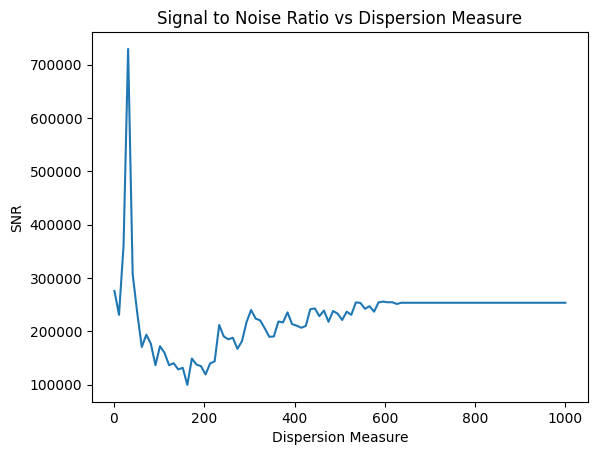

In [15]:
plt.plot(DM,snr)
plt.title('Signal to Noise Ratio vs Dispersion Measure')
plt.xlabel('Dispersion Measure')
plt.ylabel('SNR')

(0.0, 100.0)

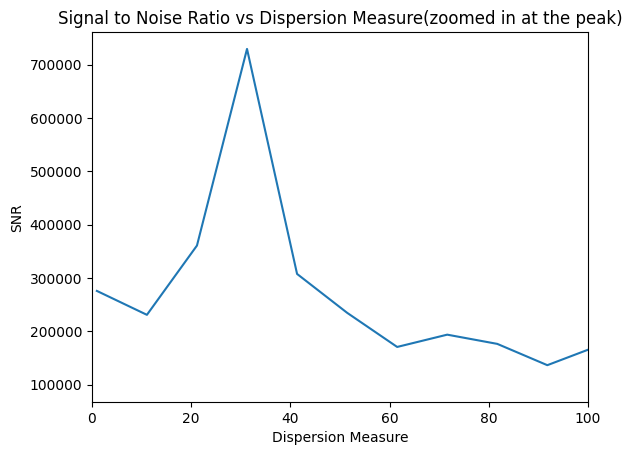

In [16]:
plt.plot(DM,snr)
plt.title('Signal to Noise Ratio vs Dispersion Measure(zoomed in at the peak)')
plt.xlabel('Dispersion Measure')
plt.ylabel('SNR')
plt.xlim(0,100)

In [11]:
DM[np.argmax(snr)]

31.272727272727273

Text(0.5, 1.0, 'Spectrogram of Dedispersed Data, at DM  31 pc cm^3(frequencies lined up)')

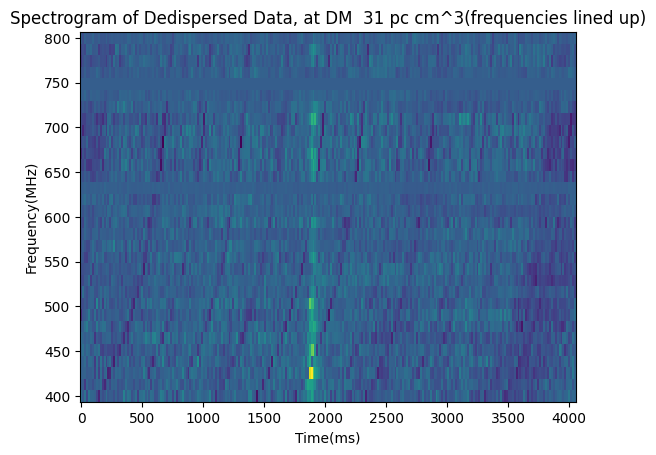

In [18]:
plt.pcolormesh(time,frequency,shifted[np.argmax(snr)])
plt.xlabel('Time(ms)')
plt.ylabel('Frequency(MHz)')
plt.title('Spectrogram of Dedispersed Data, at DM  31 pc cm^3(frequencies lined up)')